In [1]:
#task2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error



In [2]:
data = pd.read_csv("Salary Data.csv")


In [3]:
if data.isnull().sum().any():
    print("Null values found. Removing rows with missing values...")
    data = data.dropna()

Null values found. Removing rows with missing values...


In [4]:
Q1 = data["Years of Experience"].quantile(0.25)
Q3 = data["Years of Experience"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [5]:
data = data[(data["Years of Experience"] >= lower_bound) & (data["Years of Experience"] <= upper_bound)]


In [6]:
X = data[["Years of Experience"]]
y = data["Salary"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)


In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test)

In [10]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [11]:
print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

R-squared: 0.8756178750919954
Mean Squared Error: 323194282.6182971
Mean Absolute Error: 11815.409430332535


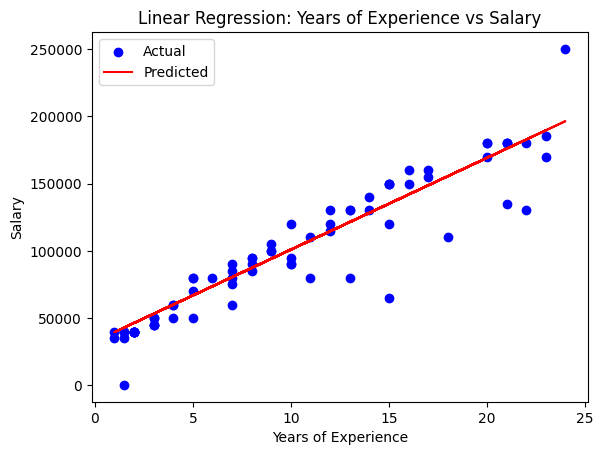

In [12]:
#task2

plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.plot(X_test, y_pred, color="red", label="Predicted")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression: Years of Experience vs Salary")
plt.legend()
plt.show()